# Path Optimisation 

A company called Protea Treks wants to optimise the path of a new trail that they are planning to build in a mountainous region of the Free State. The trail is intended to be a beginner’s trail that must not require too much exertion on behalf of its participants

## 1. Ingestion
### Altitude Map Data

In [1]:
# Import necessary packages 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns 
import random

In [2]:
# Read-in csv file and store data in pandas DataFrame
map_df = pd.read_csv("data/altitude_map.csv",header=None)
map_df.head()

,0,1,2,3,4,5,6,7,8,9,...,673,674,675,676,677,678,679,680,681,682
0,675.36,675.33,675.32,675.30,675.44,677.61,679.24,679.71,678.61,675.86,...,1404.99,1404.17,1403.03,1401.80,1400.64,1398.73,1397.44,1395.96,1393.98,1391.49
1,675.37,675.35,675.36,675.37,676.26,678.53,679.31,679.71,677.55,675.83,...,1402.85,1401.96,1400.68,1399.39,1398.30,1396.33,1394.58,1393.27,1391.28,1388.85
2,675.45,675.44,675.42,675.49,677.27,679.29,679.56,679.21,676.39,676.46,...,1400.30,1399.34,1398.11,1396.75,1395.60,1394.35,1391.63,1390.11,1388.52,1386.42
3,675.44,675.44,675.52,676.00,678.38,679.47,679.91,678.38,675.98,676.58,...,1397.66,1396.36,1395.20,1394.15,1392.84,1391.69,1390.37,1387.24,1385.18,1383.40
4,675.51,675.55,675.55,677.03,679.26,679.62,679.82,677.19,676.10,676.51,...,1395.14,1394.13,1392.62,1391.49,1390.20,1389.15,1387.82,1385.22,1382.51,1380.21


<img src = 'images/direction.png' width=900>

The altitude map measurements are provided in meters, with North and the Y-axis going up vertically. However, when referencing an Array or DataFrame object, the top most point has the coordinate 0,0 and the Y-axis goes down vertically. By re-ordering the data, the original data can be rotated to match the array indexing format, which will make further computation easier. Importantly, this rotation means that the Southern Border is now at the top of the map.

In [3]:
# Reorder data so that array indexing matches coordinates - This results in the top of the graph being south
map_df = map_df.iloc[::-1].reset_index(drop=True)
map_df.head()

,0,1,2,3,4,5,6,7,8,9,...,673,674,675,676,677,678,679,680,681,682
0,713.49,713.76,714.03,714.40,714.84,715.19,715.48,715.83,716.25,716.54,...,1175.18,1174.65,1174.56,1174.08,1173.50,1172.68,1172.18,1171.23,1170.43,1169.72
1,713.54,713.88,714.14,714.49,714.83,715.27,715.56,715.84,716.18,716.54,...,1174.13,1174.29,1174.21,1173.53,1173.29,1172.70,1172.08,1171.49,1171.08,1170.68
2,713.68,713.95,714.16,714.53,714.92,715.23,715.72,715.92,716.19,716.61,...,1172.41,1172.42,1172.05,1171.87,1171.33,1171.28,1171.39,1171.11,1170.99,1170.60
3,713.71,713.93,714.21,714.55,714.86,715.13,715.59,715.91,716.27,716.61,...,1167.99,1168.27,1168.78,1169.27,1169.40,1169.36,1169.24,1169.78,1169.77,1169.81
4,713.67,714.05,714.26,714.61,714.92,715.21,715.62,715.95,716.26,716.66,...,1164.47,1165.24,1165.30,1165.59,1165.88,1166.38,1166.77,1167.32,1168.14,1167.94


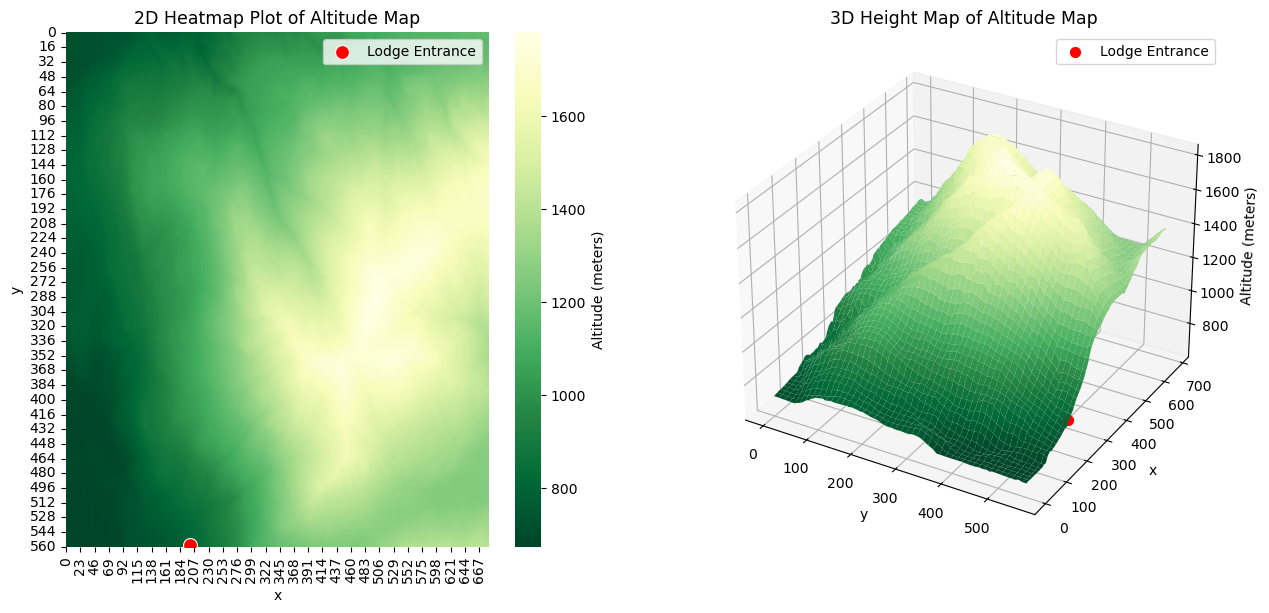

In [4]:
# Create figure to store plots 
fig = plt.figure(figsize=(15,15), dpi=100)

# Plot Heatmap of Altitude Map 
ax1 = fig.add_subplot(221)
sns.heatmap(map_df, ax=ax1, cmap = 'YlGn_r', cbar_kws={'label':'Altitude (meters)'})
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('2D Heatmap Plot of Altitude Map', fontsize=12.5)

# Plot Lodge Entrance on heat map
lodge_entrance = pd.DataFrame(data={'x': [200], 'y': [559]})
sns.scatterplot(x="x",y="y",data =lodge_entrance,s=100, ax=ax1, color='red', label='Lodge Entrance')


# Create Mesh Grid to plot 3D Altitude Map using the same dimensions as the data 
x, y = np.meshgrid(range(map_df.shape[0]), range(map_df.shape[1]))

# Plot 3D Height Map using Altitude values and Coordinate Mesh Grid
ax2 = fig.add_subplot(222, projection='3d')
ax2.scatter(559,200,800, c='red', s=50,label='Lodge Entrance')
ax2.plot_surface(x, y, map_df.T, cmap='YlGn_r')
ax2.set_xlabel('y')
ax2.set_ylabel('x')
ax2.set_zlabel('Altitude (meters)')
ax2.set_title('3D Height Map of Altitude Map', fontsize=12.5)


plt.legend()

plt.show()

From these initial visualisations we can see that the area consists of peaks on the eastern border which create steep gradients in the surrounding areas. 

### Energy Expenditure Data

In [5]:
# Read-in csv file and store data in pandas DataFrame
energy_df = pd.read_csv("data/energy_cost.csv")
energy_df.head()

,gradient,energy_cost
0,0.452115,14.831670
1,-0.002166,0.654312
2,0.457171,16.240977
3,-0.300818,2.331962
4,-0.200292,0.801025


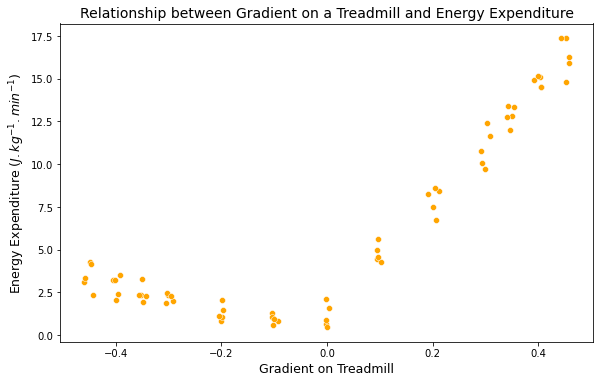

In [6]:
fig = plt.figure(figsize=(16,10))

# Plot Scatterplot to observe relationship between gradient and energy cost 
ax1 = fig.add_subplot(221)
sns.scatterplot(x='gradient', y='energy_cost', data=energy_df, ax=ax1, color = 'orange')
ax1.set_xlabel("Gradient on Treadmill", fontsize=12.5)
ax1.set_ylabel("Energy Expenditure ($J.kg^{-1}.min^{-1}$)", fontsize=12.5)
ax1.set_title("Relationship between Gradient on a Treadmill and Energy Expenditure", fontsize=14)
plt.tight_layout()
plt.show()

## 2. Modelling

Observing the scatterplot above, it appears that the relationship between the gradient on a treadmill and the energy expended can be modelled using polynomial regression. Initially, the model can be constructed as a second order polynomial regression using the equation: $$Predicted\: Energy \: Expenditure = \theta_0 + \theta_1Gradient + \theta_2Gradient^2$$
where $\theta_0, \theta_1 and \theta_2 $ represent the coefficients of the model.

In [7]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Get the values required for modelling from DataFrame
X = energy_df["gradient"].values
y = energy_df["energy_cost"].values

# Split data into training and testing data sets 
# As it a small sample size, 90% of the data is used for training and 10% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train_df, X_test_df = pd.DataFrame(X_train), pd.DataFrame(X_test)

# Create polynomial features 
poly = PolynomialFeatures(degree=2)
X_train_poly, X_test_poly = poly.fit_transform(X_train_df), poly.fit_transform(X_test_df)

# Fit the model on the training data 
poly_model = LinearRegression()
poly_model = poly_model.fit(X_train_poly, y_train)

# Evaluate the predictions of the model on the training data 
y_pred = poly_model.predict(X_test_poly)
print("R-Squared:",r2_score(y_test,y_pred))

R-Squared: 0.9470867484911019


An R-Squared value of 0.947 indicates that the model fits the data well. Plotting the regression with the original data allows us to visualise the goodness-of-fit. 

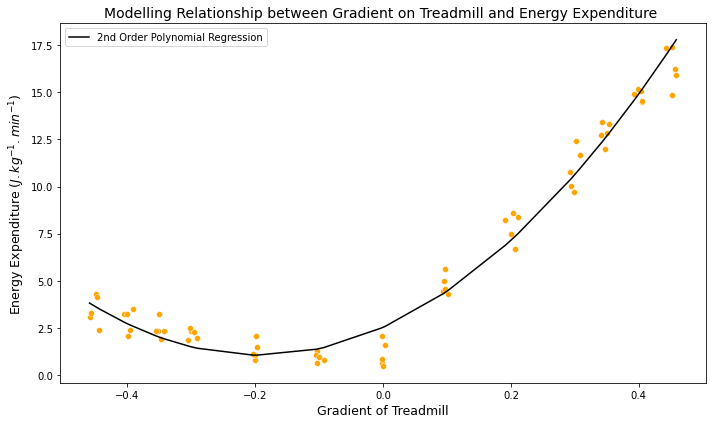

In [8]:
# Create polynomial features 
poly = PolynomialFeatures(degree=2)
X_train_poly, X_test_poly = poly.fit_transform(X_train_df), poly.fit_transform(X_test_df)

# Fit the model on the training data 
poly_model = LinearRegression()
poly_model = poly_model.fit(X_train_poly, y_train)

# Plot a 2nd order Polynomial Regression fit 
plt.figure(figsize=(10,6))
sns.scatterplot(x='gradient', y='energy_cost', data=energy_df, color='orange')
sns.lineplot(x= X_train, y= poly_model.predict(X_train_poly), color='black', label="2nd Order Polynomial Regression")
plt.xlabel("Gradient of Treadmill", fontsize=12.5)
plt.ylabel("Energy Expenditure ($J.kg^{-1}.min^{-1}$)", fontsize=12.5)
plt.title("Modelling Relationship between Gradient on Treadmill and Energy Expenditure ", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

In [9]:
# Create a function that allows us to predict the energy expended, given the gradient
def predict_energy(gradient):
    x = [[gradient]]
    poly = PolynomialFeatures(degree=2)
    x_poly = poly.fit_transform(x)
    energy_expended = poly_model.predict(x_poly)
    return energy_expended[0]

## 3. Optimisation

The objective of the optimisation task is to find a path from any point on the Southern border of the map to a lodge entrance at x=200, y=559 which minimises the total expected exertion(in Joules). 

**Methodology** <br>
First it is important to note that, due to the current coordinate format, any point is surrounded by 8 other points with the coordinates given by the figure on the left in the diagram below. 

Secondly, if the centers are being used to calculate the distance between two points with a map resolution of 10m x 10m, the distance between the centers of two adjacent points is 10m (5m to the side of the current point, 5m to the center of the next point) as indicated by the blue arrows in the figure on the right. This however is not true, for points lying diagonal to the current point, which will have a greater center-to-center distance as indicated by the red arrows in the figure on the right. 

To calculate the red distance we can use Pythagoras' Theorem to calculate the distance to the corner from the center and double that. Given that the edge of each square is 10m long, half of that would be 5m and therefore:
$$Distance\:to\:corner = \sqrt{5^2+5^2} = \sqrt{50} \approx 7.07 \:meters$$ and as a result
$$Distance \:to \: diagonal \: center = 2\sqrt{50} \approx 14.14 \: meters$$

<img src = 'images/surrounding.png'  width = 700>

In order to calculate the gradient between two points we can use the following formula 
$$ gradient = \frac{y_2-y_1}{x_2-x_1} = \frac{change\:in\:altitude}{distance\:between\:centers}$$
From this gradient we can use the <code>predict_energy</code> function created earlier to predict the energy exertion corresponding to the calculated gradient. Doing this for each of the surrounding points, allows us to know which point will require the least amount of energy to move to. Due to the fact that we know each of the points (coordinates) that can be moved to, and we can predict the amount of energy required to move into the surroundings points, we can define this optimisation problem as a **fully observable Markov Decision Process (MDP)**.

An MDP is consists of:
* $S$: a set of states in an environment 
* $A$: a set of actions 
* $R$: a reward function 
* $p$: a transition function 


The idea is that for each state $s \in S$, the agent selects an action $a \in A$ in order to maximize its cumulative reward. The reward function $R(s,a)$ defines the immediate reward for being in a state $s$ and taking an action $a$. The transition function $p(s^\prime, a, s)$ provides the probability that an agent will move into a specific next state $s^\prime$ given that the agent is in state $s$ and takes action $a$. Given that movement in the given problem is deterministic (a participant on the trail will move into the state intended), this probability will always equal 1.

*States* <br>
For this MDP we will define the states as all possible coordinate points on the map. 

$$S:\{(0,0),(0,1),(0,2),...,(x,y),...(683,561)\}$$

*Actions* <br>
Because an agent can move into any of the adjacent points we will define the possible actions as: 

$$A:\{0,1,2,3,4,5,6,7\}$$
where
* 0: move to top left
* 1: move to top mid
* 2: move to top right
* 3: move to left 
* 4: move to right
* 5: move to bottom left 
* 6: move to bottom mid
* 7: move to bottom right

*Reward function*
The reward function for this MDP needs to take into account both the gradient between two adjacent states as well as the distance between the current state and the target state (the lodge entrance). If taking action $a$ when in state $s$ results in the agent moving to state $s^\prime$. Then we can define:
* $\hat{E}(s,s^\prime):$ The predicted energy exertion for moving from state $s$ to state $s^\prime$. Although the predicted energy exertion is measured in $J.kg^{-1}.min^{-1}$ the fact that trail participants are assumed to have fixed body mass and a fixed walking speed allows us to use the predicted energy exertion as a measure of expected exertion in Joules ($J$).


* $D(s^\prime, t)$: The euclidian distance between the next state $s^\prime$ and the target state $t$, the lodge entrance.

We can combine these to define the reward function as:
$$R(s,a) = -\hat{E}(s,s^\prime) -D(s^\prime, t)$$

The negative signs in the reward function are a result of the agent inherently trying to *maximise* the cumulative reward but in this case, we are looking for the path with the *minimum* energy expenditure. The reward for moving to a location out-of-bounds of the coordinates of the map will be negative infinity, preventing the agent from moving into these points as it seeks to maximise reward.

Two other important concepts to define here are the state value function $V(s)$ and the policy $\pi$. The state value function $V(s)$ defines the value being in a particular state and a policy is a mapping from states to actions which determines which action the agent takes in a given state, i.e the agents behaviour. 

With these elements in place, we can set out solving the optimisation problem using **Dynamic Programming**, specifically the **Value Iteration Algorithm**. Dynamic Programming allows us to compute the optimal policy, which leads to the highest possible sum of future rewards at each state (or in this case the shortest path with the lowest energy exertion). In particular Value Iteration first computes the optimal state value function by iteratively updating the estimates of each state, $V(S)$. The updates prioritize immediate reward over future reward by using a discount factor $\gamma$. The update at each iteration is given as:


$$V(s)=\max _{a} \sum_{s^{\prime}, r^{\prime}} p\left(s^{\prime}, r \mid s, a\right)\left[r+\gamma V\left(s^{\prime}\right)\right]$$

Once the value of each state has been estimated, an agent simply acts greedily with respect to the value of surrounding states in order to act optimally (which is an estimated optimal policy , $\pi^*$). The pseudocode for the Value Iteration algorithm is provided below.

<img src = 'images/value_iteration.png' width=900>

**Code Implementation**

In [10]:
# Define the set of states
states = [] 

for i in range(map_df.shape[1]):
    for j in range(map_df.shape[0]):
        states.append((i,j))
        
# Define the set of actions 
actions = [0,1,2,3,4,5,6,7]

In [11]:
# Function to calculate the euclidean distance between current state and target state
def distance_to_target(current_state):
    target_state = (200,559)
    distance = np.sqrt(np.square(target_state[0]-current_state[0]) + np.square(target_state[1]-current_state[1]))
    return distance

*Note: Code cell below takes approximately 3 minutes to run* 

In [12]:
# Variables to store the distance between centers of states 
center_distance = 10
center_distance_diagonal = 2*np.sqrt(50) 

# Dictionary to store the reward function 
reward_func = {}

# Defining reward function for each state, action pair 
for state in states:
    # Add state to reward function dictionary 
    reward_func[state] = {}
    # Variables to store the x coordinate, y coordinate and altitude of current state 
    x,y = state
    altitude = map_df[x][y]

    #Top Left
    try: 
        # Find altitude of point 
        new_altitude = map_df[x-1][y-1]
        # Calculate gradient between current point and this point 
        grad = (new_altitude-altitude)/center_distance_diagonal
        # Predict energy expediture, given calculated gradient 
        pred_energy = predict_energy(gradient=grad)
        # Store reward for this state, action pair 
        reward_func[state][0] = -pred_energy-distance_to_target((x-1,y-1)), (x-1,y-1)
    except:
        reward_func[state][0] = -np.inf, state

    #top mid
    try: 
        new_altitude = map_df[x][y-1]
        grad = (new_altitude-altitude)/center_distance
        pred_energy = predict_energy(gradient=grad)
        reward_func[state][1]= -pred_energy-distance_to_target((x,y-1)), (x,y-1)
    except:
        reward_func[state][1] = -np.inf, state

    #top right
    try: 
        new_altitude = map_df[x+1][y-1]
        grad = (new_altitude-altitude)/center_distance_diagonal
        pred_energy = predict_energy(gradient=grad)
        reward_func[nostatede][2]= -pred_energy-distance_to_target((x+1,y-1)) ,(x+1,y-1)
    except:
        reward_func[state][2] = -np.inf, state

    #left
    try: 
        new_altitude = map_df[x-1][y]
        grad = (new_altitude-altitude)/center_distance
        pred_energy = predict_energy(gradient=grad)
        reward_func[state][3]= -pred_energy-distance_to_target((x-1,y)), (x-1,y) 
    except:
        reward_func[state][3] = -np.inf, state

    #right
    try: 
        new_altitude = map_df[x+1][y]
        grad = (new_altitude-altitude)/center_distance
        pred_energy = predict_energy(gradient=grad)
        reward_func[state][4]= -pred_energy-distance_to_target((x+1,y)), (x+1,y)
    except:
        reward_func[state][4] = -np.inf, state

    #bottom left
    try: 
        new_altitude = map_df[x-1][y+1]
        grad = (new_altitude-altitude)/center_distance_diagonal
        pred_energy = predict_energy(gradient=grad)
        reward_func[state][5]= -pred_energy-distance_to_target((x-1,y+1)), (x-1,y+1)
    except:
        reward_func[state][5] = -np.inf, state

    #bottom mid
    try: 
        new_altitude = map_df[x][y+1]
        grad = (new_altitude-altitude)/center_distance
        pred_energy = predict_energy(gradient=grad)
        reward_func[state][6]= -pred_energy-distance_to_target((x,y+1)), (x,y+1)
    except:
        reward_func[state][6] = -np.inf, state

    #bottom right
    try: 
        new_altitude = map_df[x+1][y+1]
        grad = (new_altitude-altitude)/center_distance_diagonal
        pred_energy = predict_energy(gradient=grad)
        reward_func[state][7]= -pred_energy-distance_to_target((x+1,y+1)), (x+1,y+1)
    except: 
        reward_func[state][7] = -np.inf, state

*Note: Code Cell below takes approximately 5 minutes to run*

In [13]:
# The Value Iteration Algorithm - Runs in approximately 
V = {s:0 for s in states}
theta = 0.0001
delta = np.inf 

while delta>theta:
    oldV = V.copy()

    for s in states:
        Q = {}
        for a in actions:
            reward, next_state = reward_func[s][a]
            Q[a] = reward + 0.9*oldV[next_state]
        V[s] = max(Q.values())
        delta= np.abs(V[s]-oldV[s])

Now by starting at each of the points along the Southern Border and continuously selecting the optimal action we can determine the optimal path by selecting the one with the highest cumulative reward.

In [14]:
# Variables to store best path and best reward 
best_path = [] 
best_reward = -np.inf

for i in range(683):
    # Variables to store current path and reward 
    current_path = [] 
    current_reward = 0 

    # Variables to store current start state 
    start_state = (i,0)
    current_state = start_state
    j = 0 

    # Check distance to target 
    while distance_to_target(current_state)>1:
        # Fail-safe if no path found using estimted values 
        j = j+1
        if j>10000:
            break 

        # Add current state to current path 
        current_path.append(current_state)

        # Calculate optimal action
        Q = {}
        for a in actions:
            reward, next_state = reward_func[current_state][a]
            Q[a] = reward + 0.9*V[next_state]
        optimal_action = max(Q, key=Q.get)

        # Take optimal action 
        reward, current_state = reward_func[current_state][optimal_action]
        current_reward += reward 
        
    # Check if path is best encountered so far, if it is then overwrite best
    if current_reward>best_reward:
        best_reward = current_reward
        best_path = current_path 

## 4. Simple Reporting

With the optimal path calculated we can write the path to a .csv file, plot the optimal path overlaid on a 2D and 3D altitude map and save the plot as a png. 

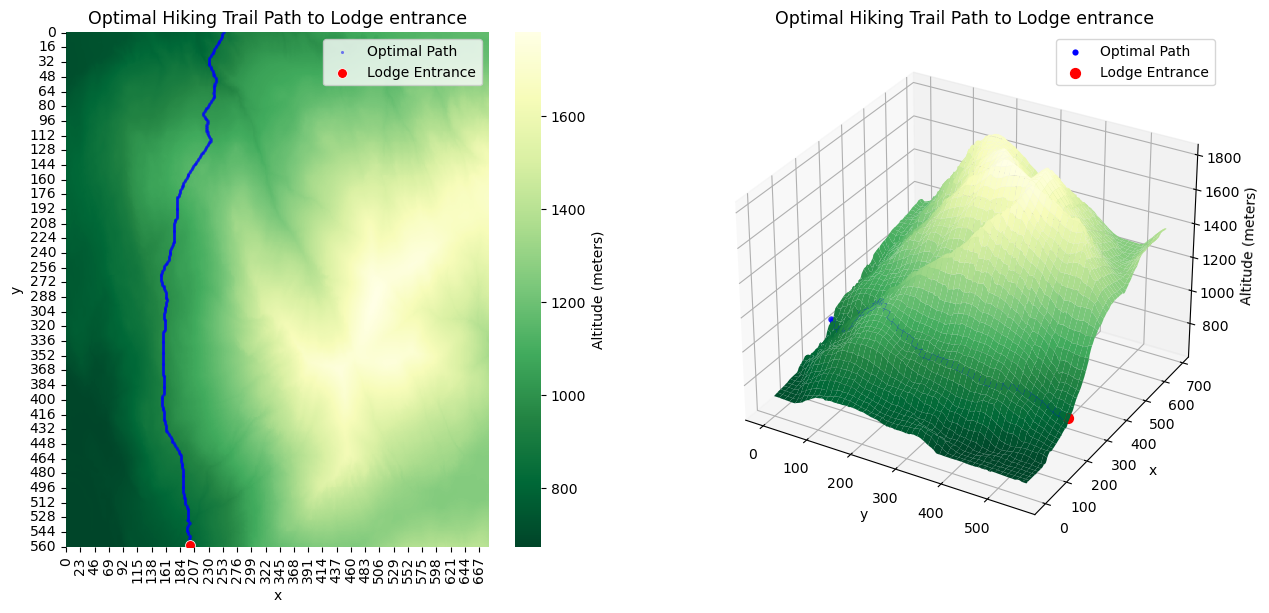

In [15]:
# Create figure to store plots 
fig = plt.figure(figsize=(15,15), dpi=100)
fig.patch.set_facecolor('white')

# Plot Heatmap of Altitude Map 
ax1 = fig.add_subplot(221)
sns.heatmap(map_df, ax=ax1, cmap = 'YlGn_r', cbar_kws={'label':'Altitude (meters)'})
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Optimal Hiking Trail Path to Lodge entrance', fontsize=12.5)

path_df = pd.DataFrame(data=best_path,columns=["x_coord","y_coord"])
sns.scatterplot(x="x_coord",y="y_coord",data =path_df,ci=None, s=5,
                alpha=0.5, color='blue', ax=ax1, linewidth=0, label='Optimal Path')

# Plot Lodge Entrance on heat map
lodge_entrance = pd.DataFrame(data={'x': [200], 'y': [559]})
sns.scatterplot(x="x",y="y",data =lodge_entrance,s=50, ax=ax1, color='red', label='Lodge Entrance')


# Create Mesh Grid to plot 3D Altitude Map using the same dimensions as the data 
x, y = np.meshgrid(range(map_df.shape[0]), range(map_df.shape[1]))

#Calculate heights add them to path data frame
heights = [map_df[best_path[i][0]][best_path[i][1]]+10 for i in range(len(best_path))]
path_df["z_coord"]=heights

# Plot 3D Height Map using Altitude values and Coordinate Mesh Grid
ax2 = fig.add_subplot(222, projection='3d')
ax2.scatter(path_df["y_coord"],path_df["x_coord"],path_df["z_coord"], c='blue',
            s=20,label='Optimal Path', linewidth=0)
ax2.scatter(559,200,heights[-1], c='red', s=50, label='Lodge Entrance')
ax2.plot_surface(x, y, map_df.T, cmap='YlGn_r')
ax2.set_xlabel('y')
ax2.set_ylabel('x')
ax2.set_zlabel('Altitude (meters)')
ax2.set_title('Optimal Hiking Trail Path to Lodge entrance', fontsize=12.5)
plt.legend()

# Save plot 
plt.savefig("optimal_path_overlaid.png")
plt.show()

# Write coordinates to .csv
path_df = path_df.drop("z_coord",axis=1)
path_df.to_csv("optimal_path_coordinates.csv",index=False)

### Future Endurance Trail Approach

In order to create an endurance trail we would need to collect energy expenditure data for steeper gradients, so that we could model the energy expenditure and gradient relationship better over a greater range of gradients. Modelling this relationship better would allow us to more accurately predict the energy expenditure required for harsh gradients and create a more intense endurance trail. 

The optimisation approach would also have to change from a minimisation problem to one that employs a maximisation heuristic. A possible alteration to the approach in future may be to view the points on the map as the nodes of a graph and the predicted energy exerted between adjacent points as the weights of directed edges between nodes, then the maximisation problem can be seen as a graph pathfinding problem. Using Graph Theory, would allow us to not only solve Shortest Path Problems using Breadth First Search but we could also use specific coordinates as nodes and create a Minimum Spanning Tree that visits all of those nodes. This is helpful as the endurance trail can then created to visit particular areas such as points of interest and viewpoints. 